# Support Vector Machine: Regression

We are still concerned with classification issues. In typical SVM we know that the only data that matters are the support vectors in terms of fitting the model, we don't care about the data lying beyond the epsilon margin. Similarly, SVR is also only concerned with a subset of the training data.

Three different types of support vector regression: SVR, NuSVR and linearSVR. 
    Linear SVR is a faster implementation but assumes the relationship between the support vectors is linear and thus only uses linear kernel.
    NuSVR uses the parameter nu to control for the number of support vectors, nu in NuSVR replaces the epsilon in regular SVR/SVM-- nu is an upper bound on the fraction of training errors and lower bound on the fraction of support vectors, e.g. if interval set is 0,1 the split is 0.5 upper and 0.5 lower
    
Similar to all other SVM models we need to classify a target vector. The model will also accept X,y vectors. However, in SVR, the y or target are float numbers

In [1]:
# USE THIS
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## USE THIS

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.shape


(500, 9)

In [3]:
df= df.drop(['Serial No.'], axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# USE THIS
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Creating the features DF and target vector

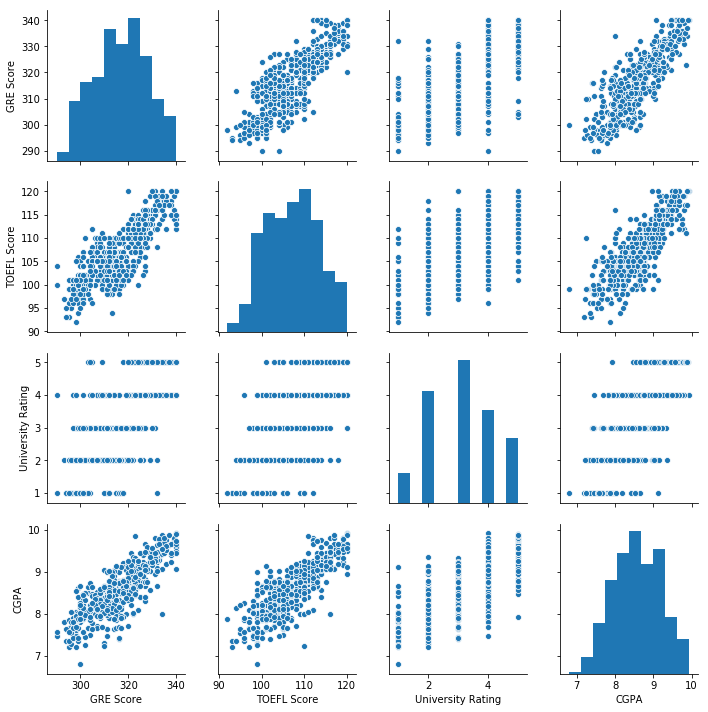

In [5]:
sns.pairplot(df, vars= ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']);

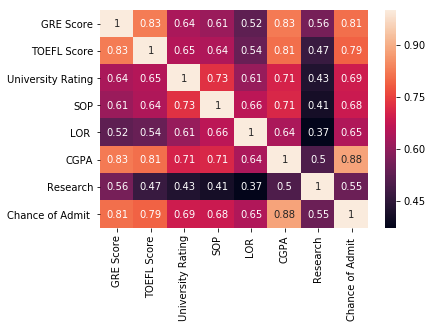

In [6]:
sns.heatmap(df.corr(), annot=True);

In [7]:
df_features = df.drop(['Chance of Admit ', 'Research', ], axis=1)


# USE THIS
X = df_features.to_numpy()
X


array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ],
       ...,
       [330.  , 120.  ,   5.  ,   4.5 ,   5.  ,   9.56],
       [312.  , 103.  ,   4.  ,   4.  ,   5.  ,   8.43],
       [327.  , 113.  ,   4.  ,   4.5 ,   4.5 ,   9.04]])

In [8]:
# USE THIS

y = df['Chance of Admit '].to_numpy()
y[1:20]

array([0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52, 0.84,
       0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62])

# Creating the training and test sets

In [9]:
# USE THIS
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(400, 6)
(100, 6)
(400,)
(100,)


In [11]:
#USE THIS

# instead of doing this here we want to keep all data into one vector.
print(X)
print(y[1:20,])

[[337.   118.     4.     4.5    4.5    9.65]
 [324.   107.     4.     4.     4.5    8.87]
 [316.   104.     3.     3.     3.5    8.  ]
 ...
 [330.   120.     5.     4.5    5.     9.56]
 [312.   103.     4.     4.     5.     8.43]
 [327.   113.     4.     4.5    4.5    9.04]]
[0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62 0.61
 0.54 0.66 0.65 0.63 0.62]


# Feature Scaling

Here we will standardize the scale of each feature set. We do this becasue the scale or measurement units for each feature will not be uniform and thus we may end up with data points that should not necessarily be combined. We may have variables which vary much more than another. In this instance we may have a variable such as GRE score which has a much higher range and std compared with research or Letters of recommendation (LOR). In order to account for this we need to conduct feature scaling which will normalize and standardize all the measured features and center them around 0. This decreases the chance that one variable which has high variability inadvertently acccounts for a disproportionate amount of the variance in the model. For an example see [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).  Also if interested in the understanding why the scaler doesn't get the scaled mean or your features to exactly '0' then read [this](https://stackoverflow.com/questions/40405803/mean-of-data-scaled-with-sklearn-standardscaler-is-not-zero).

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
from sklearn import preprocessing
X_scaled=preprocessing.scale(X)
print(X_scaled)

scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)
print(scaler.mean_)
scaler.transform(X_train)
scaler.transform(X_test)

[[ 1.81923762  1.77886545  0.77558214  1.13735981  1.09894429  1.77680627]
 [ 0.66714832 -0.03160087  0.77558214  0.63231549  1.09894429  0.48585943]
 [-0.0418297  -0.52536441 -0.09979274 -0.37777315  0.01730621 -0.95404281]
 ...
 [ 1.19888185  2.10804114  1.65095702  1.13735981  1.63976333  1.62785086]
 [-0.39631872 -0.68995225  0.77558214  0.63231549  1.63976333 -0.24236699]
 [ 0.93301508  0.95592621  0.77558214  1.13735981  1.09894429  0.76721964]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[316.1     107.145     3.11      3.3525    3.48875   8.57505]


array([[ 1.31585605,  1.43611217,  1.62791966,  0.64847547,  0.55314784,
         1.13562901],
       [-0.18545622, -0.18569717, -0.9560798 ,  0.64847547,  0.01217196,
        -0.53892431],
       [ 2.02235595,  1.43611217,  0.76658651,  0.64847547,  0.01217196,
         2.03093475],
       [ 0.9626061 ,  1.27393124,  0.76658651,  0.14772221,  0.55314784,
         0.93667218],
       [-1.77508098, -1.64532558, -0.9560798 , -1.85529083, -1.6107557 ,
        -1.28501243],
       [-0.80364363,  0.30084563, -0.09474665,  0.64847547, -0.52880393,
        -0.95341771],
       [-1.33351855, -1.32096371, -0.09474665, -0.85378431, -1.6107557 ,
        -0.2073296 ],
       [ 1.13923108,  1.1117503 ,  1.62791966,  1.14922873,  1.63509962,
         1.01957086],
       [-0.53870617, -1.32096371, -0.9560798 , -1.85529083, -1.6107557 ,
        -2.11399922],
       [ 1.13923108,  0.6252075 ,  0.76658651,  1.14922873,  0.55314784,
         1.0858898 ],
       [-1.42183104, -1.96968745, -0.9560798 , -0.

In [14]:
y_scaled=preprocessing.scale(y)
y_scaled
print(y_scaled.mean())
print(y_scaled.std())

-3.304023721284466e-16
1.0


# Creating the model

In [15]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import permutation_test_score
from sklearn.utils import shuffle

In [16]:
svr = SVR(kernel='linear',epsilon = 0.1, C = 30)

In [17]:
svr.fit(X_scaled, y_scaled)

SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
pred_svr = svr.predict(X_test) # This is where we predict the original model. 

Here we need to shuffle (permute) 

beta_arr = np.array([])
count = 0
r_squared_arr = np.array([])
p_value= np.array([])
weights = np.array([])

We need a while loop which first initializes the count at 0. Then the while loop will be:

for ii in  range(10001)
    y_scaled = shuffle(y_scaled) # random state gives you the option to pseudo randomize the permutation operation of 'shuffle'. 
    svr.fit(X_scaled, y_scaled)
    np.beta_arr.append(beta value from model)
    np.r_squared_arr.append(r^2 value from model)
    np.p_value.append([])
    np.weights.append([])
    count = count + 1
end 
    
    

In [19]:


#count = 0
#while count < 50:
#    print "Some thing"
#    count = count + 1

In [20]:
pred_SVR = svr.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score

In [1]:
hyp_score =svr.score(X_scaled, y_scaled.values.ravel())

NameError: name 'svr' is not defined

Randomize the predicted score to the inputs---permutation testing---10,000 --model better than chance
And also permutation testing for betas that come out of the model----output in matrix region x region specific matrix.


Things that permute the organization of the network itself

feature set be limited to 0 or 1s

In [23]:
svr.get_params(deep=True)

{'C': 30,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
svr.coef_

array([[0.21278058, 0.10349913, 0.05804293, 0.03020908, 0.09285087,
        0.47931896]])

In [25]:
perm_svr = SVR(kernel='linear',epsilon = 0.1, C = 30)
beta_arr = np.array([]) # beta weights as they are returned by fitting the model
count = 0
r_squared_arr = np.array([])
weights = np.array([])


In [26]:
import time

start = time.time()


for ii in range(200):
    y_scaled = shuffle(y_scaled) # Will randomly permute the y-target vector
    perm_svr.fit(X_scaled, y_scaled) # fits the randomly permuted target vector to the feature set (connections between and within each region)
    beta_arr = np.append(beta_arr, perm_svr.coef_) # appends the beta weights of each feature (i.e. connections between and within each region)
    r_squared_arr = np.append(r_squared_arr, perm_svr.score(X_scaled, y_scaled)) # appends the r^2 value for each model which will create the null distribution
    count = count + 1 # iterative counter which if ii = >=10000 it will kill the loop.

    
end = time.time()
print(end-start)

27.11743950843811


In [27]:
beta_arr

array([-0.10140424, -0.00855149, -0.04816248, ..., -0.04577796,
       -0.01392942, -0.0322439 ])

In [28]:
count

200

In [29]:
r_squared_arr

array([ 7.06049073e-03,  1.55570883e-02,  5.98387882e-03,  3.91999235e-04,
        6.63803383e-03,  1.30081374e-02,  5.97010492e-03, -5.20244280e-03,
        1.75682963e-03,  9.73824586e-03,  5.60513165e-03,  1.09234533e-02,
        4.95640689e-03,  5.67427547e-04,  3.62264666e-04,  6.35720826e-03,
        7.61205397e-03,  1.41244456e-02,  3.49920328e-03,  1.32704714e-02,
        2.58459668e-03,  1.64108116e-03,  3.70557747e-03,  5.81096387e-03,
       -2.69545461e-04,  4.44327810e-03,  7.54898985e-03,  1.32429284e-02,
        2.45262308e-02,  1.87232510e-02,  1.70594650e-03,  3.80180853e-03,
        7.52820691e-03, -1.36498041e-03,  8.96031458e-03,  2.96195685e-03,
        1.60374023e-03,  7.29374794e-03, -1.43798851e-03,  1.10618273e-02,
        8.83194899e-03,  2.10837232e-02,  3.46151180e-03, -3.74957837e-03,
        5.61248857e-03,  6.80300378e-03,  7.51868624e-03,  2.37292666e-03,
        4.13010444e-03,  2.45290868e-02,  5.93574636e-03,  1.07162825e-02,
        7.67536436e-03, -

In [30]:
print(r_squared_arr)

[ 7.06049073e-03  1.55570883e-02  5.98387882e-03  3.91999235e-04
  6.63803383e-03  1.30081374e-02  5.97010492e-03 -5.20244280e-03
  1.75682963e-03  9.73824586e-03  5.60513165e-03  1.09234533e-02
  4.95640689e-03  5.67427547e-04  3.62264666e-04  6.35720826e-03
  7.61205397e-03  1.41244456e-02  3.49920328e-03  1.32704714e-02
  2.58459668e-03  1.64108116e-03  3.70557747e-03  5.81096387e-03
 -2.69545461e-04  4.44327810e-03  7.54898985e-03  1.32429284e-02
  2.45262308e-02  1.87232510e-02  1.70594650e-03  3.80180853e-03
  7.52820691e-03 -1.36498041e-03  8.96031458e-03  2.96195685e-03
  1.60374023e-03  7.29374794e-03 -1.43798851e-03  1.10618273e-02
  8.83194899e-03  2.10837232e-02  3.46151180e-03 -3.74957837e-03
  5.61248857e-03  6.80300378e-03  7.51868624e-03  2.37292666e-03
  4.13010444e-03  2.45290868e-02  5.93574636e-03  1.07162825e-02
  7.67536436e-03 -1.50234977e-03  4.60377478e-03  5.16641691e-02
  1.84774157e-04  4.06236004e-03  1.08950461e-02  3.37040871e-03
  8.38234461e-03  4.01351

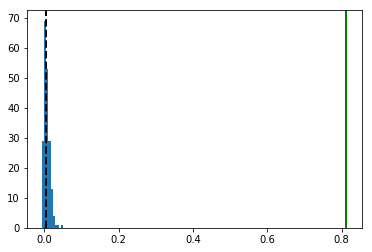

In [31]:
plt.hist(r_squared_arr, bins=10);
plt.axvline(np.median(r_squared_arr), color='k', linestyle='dashed', linewidth=2)
plt.axvline(hyp_score, color='green', linestyle='solid', linewidth=2)

In [32]:
hyp_score

0.8129159608423469

Here we will now compute the p-value for the number of models which performed at or better than the original model, including the original model itself. 

In [33]:
num_mods = count + 1
print(num_mods)

201


In [34]:
num_obs_btr_than_hyp = 0

for ii in r_squared_arr:
    if ii > hyp_score:
        num_obs_btr_than_hyp = num_obs_btr_than_hyp + 1
    print(num_obs_btr_than_hyp)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [35]:
num_obs_btr_than_hyp = num_obs_btr_than_hyp + 1 

In [36]:
num_obs_btr_than_hyp/num_mods

0.004975124378109453